### 👲 Profile Details:

- Name: Khan Md Shibli Nomani
- email: kmshiblinomanii@gmail.com
- LinkedIn: https://www.linkedin.com/in/khan-md-shibli-nomani-45445612b/
- whatsApp: +8801672403057
- Github: https://github.com/Shibli-Nomani
- kaggle: https://www.kaggle.com/shiblinomani


# 💉 Predictive Modeling for Disease Diagnosis

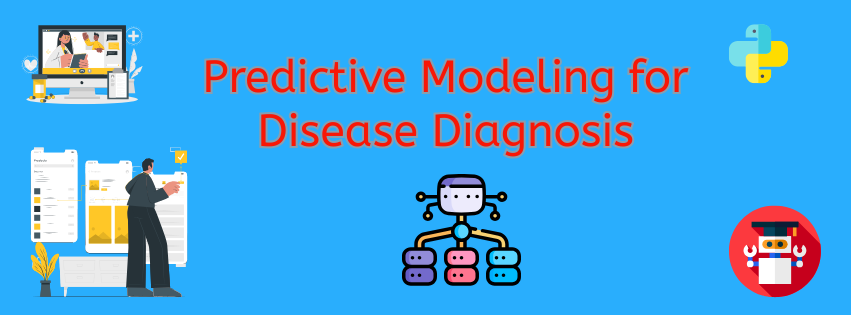

# 🏥 About Dataset

Data Description:
The dataset consists of the following attributes:
- Cholesterol: Level of cholesterol in the blood (mg/dL)
- Hemoglobin: Protein in red blood cells carrying oxygen
- Platelets: Blood cells aiding in clotting
- White Blood Cells (WBC): Immune system cells fighting infections
- Red Blood Cells (RBC): Cells carrying oxygen
- Hematocrit: Percentage of blood volume occupied by RBC
- Mean Corpuscular Volume (MCV): Average volume of RBC
- Mean Corpuscular Hemoglobin (MCH): Average amount of hemoglobin in RBC
- Mean Corpuscular Hemoglobin Concentration (MCHC): Average concentration of hemoglobin in RBC
- Insulin: Hormone regulating blood sugar levels
- BMI (Body Mass Index): Measure of body fat based on height and weight
- Systolic Blood Pressure (SBP): Pressure in arteries during heartbeats
- Diastolic Blood Pressure (DBP): Pressure in arteries at rest between beats
- Triglycerides: Type of fat found in blood (mg/dL)
- HbA1c (Glycated Hemoglobin): Measure of average blood sugar levels over past 2-3 months
- LDL (Low-Density Lipoprotein) Cholesterol: "Bad" cholesterol
- HDL (High-Density Lipoprotein) Cholesterol: "Good" cholesterol
- ALT (Alanine Aminotransferase): Liver enzyme
- AST (Aspartate Aminotransferase): Enzyme found in liver and heart
- Heart Rate: Number of heartbeats per minute (bpm)
- Creatinine: Waste product produced by muscles and filtered by kidneys
- Troponin: Protein released into bloodstream during heart muscle damage
- C-reactive Protein (CRP): Marker of inflammation in the body
- Disease: Binary indicator (1: Diseased, 0: Non-diseased)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 🌄 Import Libraries

In [65]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# DataFrame
import pandas as pd
# Mathematical computation
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data split
from sklearn.model_selection import train_test_split

# Oversampling
from imblearn.over_sampling import SMOTE

# Data scaling
from sklearn.preprocessing import StandardScaler

# Model building
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# Cross Validation
from sklearn.model_selection import cross_val_score, GridSearchCV

#save model
from joblib import dump

#load model
from joblib import load


# 🎡 Data Loading

In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/Problem Statement - Disease Prediction/Train_data.csv")
print(f"Dataset detais: \n")
dataset.head(5)

Dataset detais: 



,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


# 🔰 Data Analysis and Preprocessing

In [5]:
#check any null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [6]:
#check category imbalance
dataset['Disease'].value_counts()

Disease
Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: count, dtype: int64

In [7]:
# Map categories to binary values using lambda function
dataset['Disease'] = dataset['Disease'].map(lambda x: 0 if x == 'Healthy' else 1)
dataset

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,0
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,1
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,1
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,1
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.670665,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,1
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.491185,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,1
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.141738,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,1
2349,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.570553,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,1


In [12]:
#category status after mapping for No Disease and Disease category
dataset['Disease'].value_counts()

Disease
1    1795
0     556
Name: count, dtype: int64

### ⚠️ Outliers Detection

Outliers Detection is the process of identifying and handling data points that significantly deviate from the rest of the dataset. 📊 Outliers can distort statistical analyses and machine learning models, impacting the accuracy and reliability of results. Hence, detecting and addressing outliers is crucial for maintaining data quality and model performance.

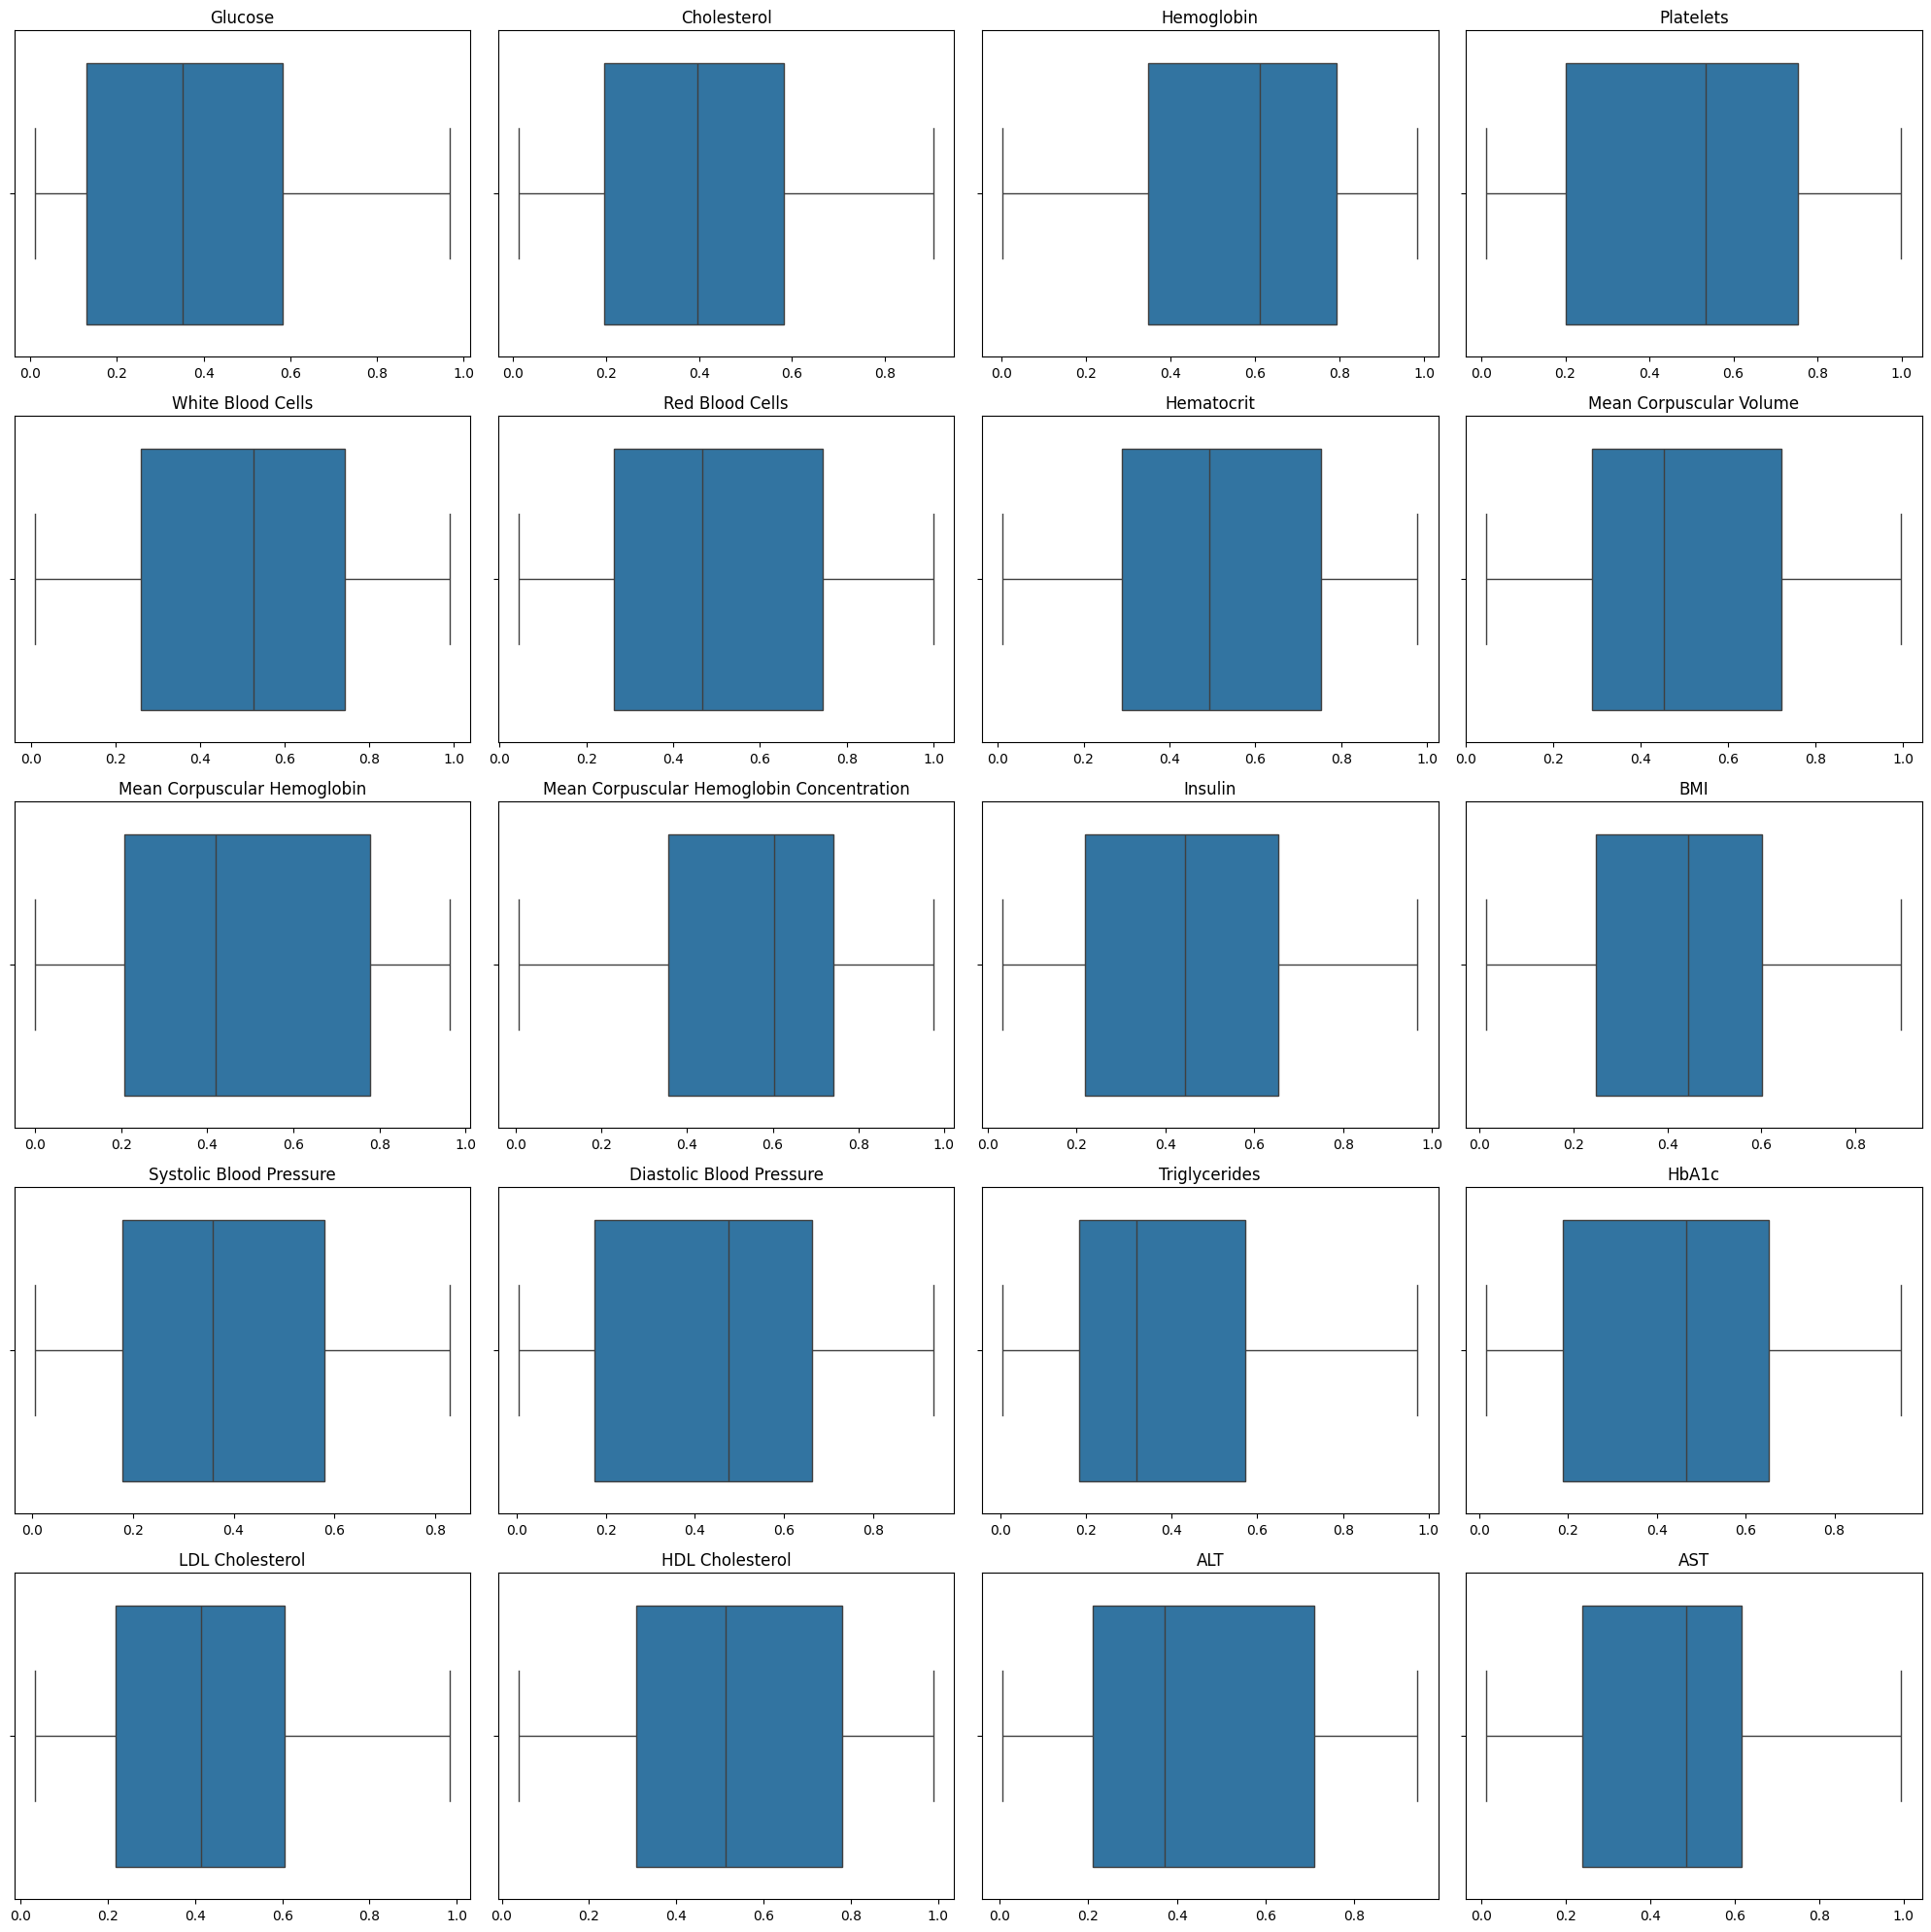

In [11]:
# Set up the plot
fig, axes = plt.subplots(5, 4, figsize=(20, 20))

# Flatten axes for ease of iteration
axes = axes.flatten()
column_list = ['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein']

# Plot box plots for each column
for i, (col, ax) in enumerate(zip(column_list, axes)):
    sns.boxplot(x=dataset[col], ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')

# Remove any extra empty subplots
for ax in axes[len(dataset.columns):]:
    ax.remove()

# Adjust layout
plt.tight_layout()
plt.show()

### ♨️ Correlation Heatmap

A correlation heatmap, often computed using Pearson correlation coefficient, 📊 is a visual representation of the correlation between different variables in a dataset. It provides a graphical overview of how strongly different variables are related to each other. The Pearson correlation coefficient measures the linear relationship between two variables, ranging from -1 to 1, where -1 indicates a perfect negative linear relationship, 1 indicates a perfect positive linear relationship, and 0 indicates no linear relationship.

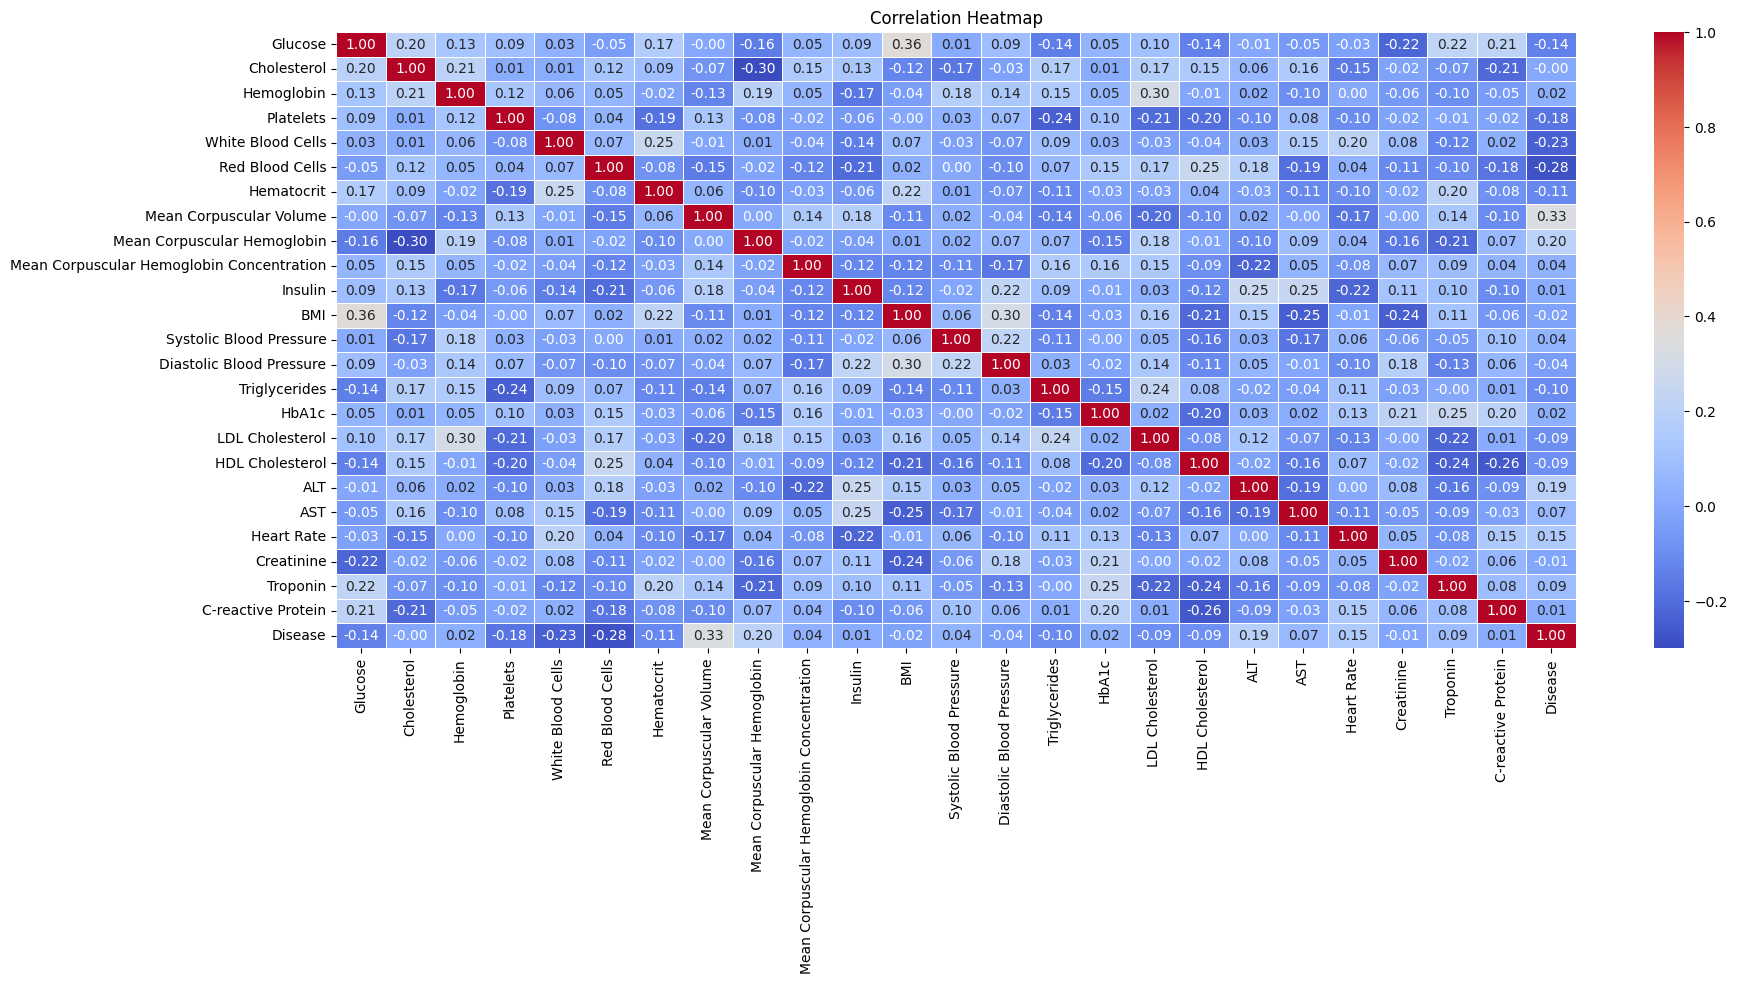

In [13]:
# Compute the correlation matrix
corr = dataset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap')

# Show plot
plt.show()

### 🚉 Features and Target

In [14]:
#Features
X = dataset.drop('Disease', axis =1)

#Target
y = dataset['Disease']

# ⛄ Apply Oversampling on Imbalance Dataset

SMOTE oversampling is applied to address class imbalance by generating synthetic samples from the minority class, thereby enhancing the representation of minority class instances in the dataset. 🔄 This helps in improving the performance and robustness of machine learning models trained on imbalanced data.

In [15]:
#oversampling
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [16]:
# Concatenate X_resampled and y_resampled column-wise
Xy_resampled = df_concatenated = pd.concat([X_resampled, y_resampled], axis=1)

In [17]:
#dataset after applying Oversampling
print(f"shape of dataset after oversampling: {Xy_resampled.shape}\n")
Xy_resampled.head(5)


shape of dataset after oversampling: (3590, 25)



,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,0
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,1
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,1
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,1
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,1


In [18]:
#balance target variable
Xy_resampled['Disease'].value_counts()

Disease
0    1795
1    1795
Name: count, dtype: int64

# 🐹 Data Splitting and Scaling

In [19]:
#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state = 42, stratify = y_resampled)

**📌 note:** StandardScaler is a preprocessing technique that scales and centers numerical features, transforming them to have a mean of 0 and a standard deviation of 1, ensuring uniformity and comparability across features. 📏

In [20]:
#apply standard scaler
scaler = StandardScaler()

In [21]:
#training scale
X_train_scaled = scaler.fit_transform(X_train)

#testing scale
X_test_scaled = scaler.transform(X_test)

print(f"shape of X_train_scaled: {X_train_scaled.shape}")
print(f"shape of X_test_scaled: {X_test_scaled.shape}")

shape of X_train_scaled: (2692, 24)
shape of X_test_scaled: (898, 24)


# 📕 Model Selection

In [22]:
#model build:

models = [
   LogisticRegression(),
   LinearSVC(random_state=42),
   SGDClassifier(),
   KNeighborsClassifier(),
   RandomForestClassifier(random_state=42),
   DecisionTreeClassifier(random_state=42),
   GradientBoostingClassifier(random_state=42),
   XGBClassifier(random_state=42),
   AdaBoostClassifier(random_state=42),
   LinearDiscriminantAnalysis()
   ]

In [33]:
# Training Model
def multiple_model_evaluation(models, X_train_scaled, y_train, X_test_scaled, y_test):
    names =['Logestic Regression', 'SVMLinear', 'SGD', 'KNN', 'RandomForest', 'DecisionTree', 'GradientBoost', 'XGBOOST', 'ADABoost', 'LDA']

    models_columns = []
    models_compare = pd.DataFrame(columns = models_columns)

    row_index = 0
    for models_name, ml in zip(names, models):
        ml.fit(X_train_scaled, y_train)
        y_pred=ml.predict(X_test_scaled)
        fp, tp, tn = roc_curve(y_test, y_pred)
        models_compare.loc[row_index,'Model Name'] = models_name
        models_compare.loc[row_index, 'Train Accuracy'] = round(ml.score(X_train_scaled, y_train), 5)
        models_compare.loc[row_index, 'Test Accuracy'] = accuracy_score(y_test, y_pred)
        models_compare.loc[row_index, 'Precission'] = precision_score(y_test, y_pred)
        models_compare.loc[row_index, 'Recall'] = recall_score(y_test, y_pred)
        models_compare.loc[row_index, 'f1 Score']=f1_score(y_test, y_pred)
        models_compare.loc[row_index, 'AUC'] = auc(fp, tp)
        row_index += 1
    return models_compare

# Model comparison table
resulted_outputs = multiple_model_evaluation(models, X_train_scaled, y_train, X_test_scaled, y_test)
resulted_outputs.sort_values(by='Test Accuracy', ascending=False, inplace=True)
resulted_outputs.style.set_properties(**{'background-color': 'white', 'color': 'black'})


,Model Name,Train Accuracy,Test Accuracy,Precission,Recall,f1 Score,AUC
0,Logestic Regression,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,SVMLinear,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,SGD,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,KNN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,RandomForest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,DecisionTree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,GradientBoost,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,XGBOOST,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,ADABoost,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,LDA,0.922730,0.923163,1.000000,0.846325,0.916767,0.923163



**📌note:** is chosen for its robustness, versatility, and ability to handle both classification and regression tasks effectively. With its ensemble of decision trees and bootstrap aggregation, Random Forest offers high accuracy, minimal overfitting, and resilience to noisy data, making it a popular choice for various machine learning applications.

# 🔥 Confusion Matrix over Best Model(Random Forest Regression)

Model Details: RandomForestClassifier(random_state=42)


Predicted result over test data: [1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1
 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1
 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0
 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1
 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1
 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1
 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0
 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0
 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1
 0 1 1 0 1

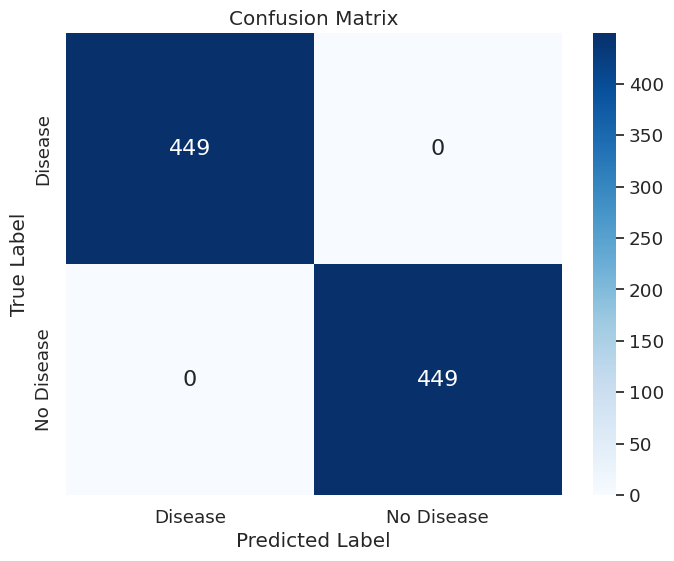

In [34]:
# Best Model and Evaluation over Test Data

def model_evaluation(selected_model, X_train_scaled, y_train, X_test_scaled, y_test):
    # Model fitting and prediction
    best_model_chosen = selected_model
    print(f"Model Details: {best_model_chosen}\n\n")

    best_model_chosen.fit(X_train_scaled, y_train)
    y_pred = best_model_chosen.predict(X_test_scaled)
    print(f"Predicted result over test data: {y_pred}")

    # Mapping dictionary for integer labels to categories
    label_map = {1: "Disease", 0: "No Disease"}

    # Replace integer labels with categories for y_test and y_pred
    y_test_categories = np.array([label_map[label] for label in y_test])
    y_pred_categories = np.array([label_map[label] for label in y_pred])

    # Generate classification report
    report = classification_report(y_test_categories, y_pred_categories)

    # Print classification report
    print("Classification Report:")
    print(report)

    # Get unique classes from true and predicted labels and convert them to a list of strings
    classes = np.unique(np.concatenate((y_test_categories, y_pred_categories)))

    # Compute confusion matrix
    cm = confusion_matrix(y_test_categories, y_pred_categories, labels=classes)

    # Create a DataFrame for confusion matrix
    cm_df = pd.DataFrame(cm, index=classes, columns=classes)

    # Plot confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

#model evaluation
model_evaluation(models[4], X_train_scaled,  y_train, X_test_scaled, y_test)

# 👽 Model Performance over Unseen Dataset

In [35]:
unseen_dataset = pd.read_csv("/content/drive/MyDrive/Problem Statement - Disease Prediction/test_data.csv")
print("Unseen dataset for testing")
unseen_dataset.head(5)

Unseen dataset for testing


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


In [36]:
#Binary Classification
# Map categories to binary values using lambda function
unseen_dataset['Disease'] = unseen_dataset['Disease'].map(lambda x: 0 if x == 'Healthy' else 1)
#calegorical value counts for unseen data
print(f"categorical details of unseen test data: {unseen_dataset['Disease'].value_counts()}")
#Features
X_unseen = unseen_dataset.drop('Disease', axis = 1)
#scaling dataset
X_unseen_scaled = scaler.transform(X_unseen)
#target
y_unseen = unseen_dataset['Disease']


categorical details of unseen test data: Disease
1    481
0      5
Name: count, dtype: int64


# 💤 Model Prediction Over Unseen Data

model_details: RandomForestClassifier(random_state=42)
accuracy of unseen data: 0.9423868312757202
Classification Report:
              precision    recall  f1-score   support

     Disease       0.99      0.95      0.97       481
  No Disease       0.07      0.40      0.12         5

    accuracy                           0.94       486
   macro avg       0.53      0.67      0.55       486
weighted avg       0.98      0.94      0.96       486



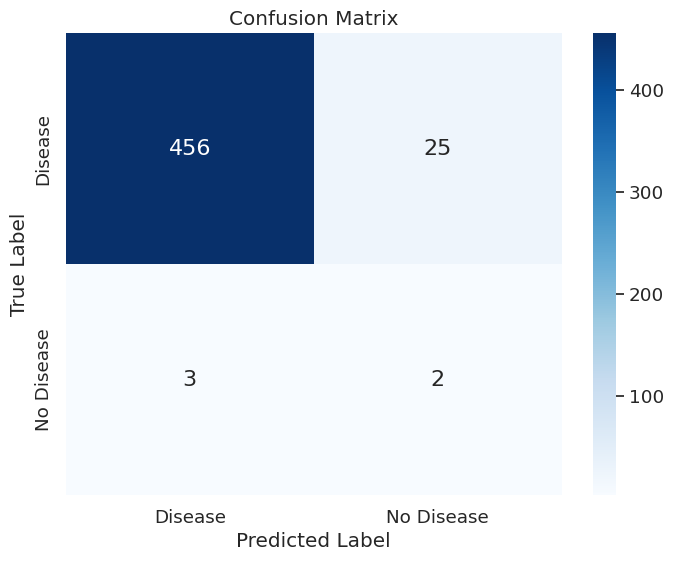

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [51]:
def model_prediction_unseen( model_name,  X_train_scaled, y_train, X_unseen_scaled, y_unseen):
  model = model_name
  print("model_details:", model)

  #predict model
  model.fit(X_train_scaled, y_train)
  y_pred_unseen = model.predict(X_unseen_scaled)

  print(f"accuracy of unseen data: {accuracy_score(y_unseen, y_pred_unseen)}")

  #classification report

  #Mapping dictionary for integer labels to categories
  label_map = {1: "Disease", 0: "No Disease"}

  #Replace integer labels with categories for y_test and y_pred
  y_unseen_categories = np.array([label_map[label] for label in y_unseen])
  y_pred_unseen_categories = np.array([label_map[label] for label in y_pred_unseen])

  #Generate classification report
  report = classification_report(y_unseen_categories, y_pred_unseen_categories)

  #Print classification report
  print("Classification Report:")
  print(report)

  # Get unique classes from true and predicted labels and convert them to a list of strings
  classes = np.unique(np.concatenate((y_unseen_categories, y_pred_unseen_categories)))

  # Compute confusion matrix
  cm = confusion_matrix(y_unseen_categories, y_pred_unseen_categories, labels=classes)

  # Create a DataFrame for confusion matrix
  cm_df = pd.DataFrame(cm, index=classes, columns=classes)

  # Plot confusion matrix heatmap
  plt.figure(figsize=(8, 6))
  sns.set(font_scale=1.2)
  sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')
  plt.show()

  return y_pred_unseen

#result details:
model_prediction_unseen(models[4],  X_train_scaled, y_train, X_unseen_scaled, y_unseen)

# 😇 Model Fine Tuning and Save the model

In [62]:
def fine_tuned_reduced_overfitting(model_name, X_train_scaled, y_train, X_test_scaled, y_test, X_unseen_scaled, y_unseen):
  # Perform 5-fold cross-validation
  cv_scores = cross_val_score(model_name, X_train_scaled, y_train, cv=5)
  print("Cross-validation scores:", cv_scores)
  print("Mean CV accuracy:", np.mean(cv_scores))


  # Define hyperparameters grid
  param_grid = {
      'n_estimators': [50, 100, 200],
      'max_depth': [None, 10, 20],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4]
  }

  # Initialize GridSearchCV for random forest regressor
  grid_search = GridSearchCV(model_name, param_grid, cv=5, scoring='accuracy')

  # Fit the grid search to the data
  grid_search.fit(X_train_scaled, y_train)

  # Print the best hyperparameters
  print("Best hyperparameters:", grid_search.best_params_)

  # Get the best model
  best_rf = grid_search.best_estimator_
  print(f"model output with best estimator: {best_rf}")
  # Make predictions
  #test data
  y_best_test_pred = best_rf.predict(X_test_scaled)
  #unseen data
  y_best_pred = best_rf.predict(X_unseen_scaled)

  print(f"best predicted output: {y_best_pred}")

  # Result for training dataset
  train_accuracy = round(best_rf.score(X_train_scaled, y_train) * 100, 2)
  print(f"Accuracy Score after Hyperparameters Tuning for training dataset: {train_accuracy}%")

  # Result for test/validation dataset
  test_accuracy = round(best_rf.score(X_test_scaled, y_test) * 100, 2)
  print(f"Accuracy Score after Hyperparameters Tuning for test/validation dataset: {test_accuracy}%")

  # Result for unseen dataset
  unseen_accuracy = round(best_rf.score(X_unseen_scaled, y_unseen) * 100, 2)
  print(f"Accuracy Score after Hyperparameters Tuning for unseen dataset: {unseen_accuracy}%")

  # Save the model to a file
  dump(best_rf, 'best_rf_model.joblib')

  print("Model saved successfully.")

  return best_rf, y_best_pred


#output
final_model = fine_tuned_reduced_overfitting(models[4], X_train_scaled, y_train, X_test_scaled, y_test, X_unseen_scaled, y_unseen)

final_model


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
model output with best estimator: RandomForestClassifier(n_estimators=50, random_state=42)
best predicted output: [1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1

(RandomForestClassifier(n_estimators=50, random_state=42),
 array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 

# 🌟 Final Model Evaluation

Classification Report:
              precision    recall  f1-score   support

     Disease       0.99      0.95      0.97       481
  No Disease       0.08      0.40      0.13         5

    accuracy                           0.95       486
   macro avg       0.54      0.68      0.55       486
weighted avg       0.98      0.95      0.96       486



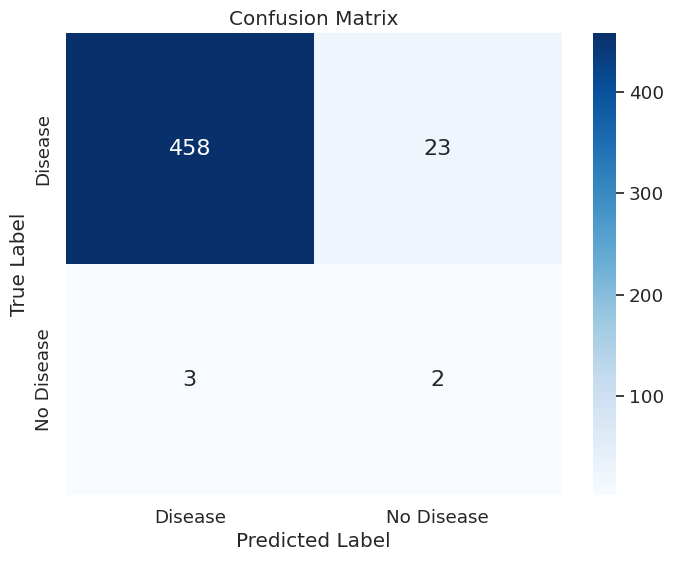

In [64]:
def final_result(model_name, y_unseen, y_best_pred):
  #classification report

  #Mapping dictionary for integer labels to categories
  label_map = {1: "Disease", 0: "No Disease"}

  #Replace integer labels with categories for y_test and y_pred
  y_unseen_categories = np.array([label_map[label] for label in y_unseen])
  y_pred_unseen_categories = np.array([label_map[label] for label in y_best_pred])

  #Generate classification report
  report = classification_report(y_unseen_categories, y_pred_unseen_categories)

  #Print classification report
  print("Classification Report:")
  print(report)

  # Get unique classes from true and predicted labels and convert them to a list of strings
  classes = np.unique(np.concatenate((y_unseen_categories, y_pred_unseen_categories)))

  # Compute confusion matrix
  cm = confusion_matrix(y_unseen_categories, y_pred_unseen_categories, labels=classes)

  # Create a DataFrame for confusion matrix
  cm_df = pd.DataFrame(cm, index=classes, columns=classes)

  # Plot confusion matrix heatmap
  plt.figure(figsize=(8, 6))
  sns.set(font_scale=1.2)
  sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')

  return plt.show()


#output
final_result(final_model[0], y_unseen, final_model[1])

# 😂 Load Model and Generate Output

In [71]:
#load model

# Load the saved model
best_rf = load('/content/best_rf_model.joblib')

def predict_disease():
    # Define input prompts with names
    prompts = [
        ("Glucose", float),
        ("Cholesterol", float),
        ("Hemoglobin", float),
        ("Platelets", float),
        ("White Blood Cells", float),
        ("Red Blood Cells", float),
        ("Hematocrit", float),
        ("Mean Corpuscular Volume", float),
        ("Mean Corpuscular Hemoglobin", float),
        ("Mean Corpuscular Hemoglobin Concentration", float),
        ("Insulin", float),
        ("BMI", float),
        ("Systolic Blood Pressure", float),
        ("Diastolic Blood Pressure", float),
        ("Triglycerides", float),
        ("HbA1c", float),
        ("LDL Cholesterol", float),
        ("HDL Cholesterol", float),
        ("ALT", float),
        ("AST", float),
        ("Heart Rate", float),
        ("Creatinine", float),
        ("Troponin", float),
        ("C-reactive Protein", float)
    ]

    # Collect input values from the user
    data = {}
    for prompt, datatype in prompts:
        value = input(f"Enter {prompt}: ")
        data[prompt] = datatype(value)

    # Create a DataFrame with the input features
    features = pd.DataFrame(data, index=[0])

    # Make prediction
    prediction = best_rf.predict(features)

    # Convert binary outcome to labels
    label = "Disease" if prediction[0] == 1 else "No Disease"

    return label

# Example usage:
predicted_label = predict_disease()
print("Predicted Label:", predicted_label)


Enter Glucose: 0.001827
Enter Cholesterol: 0.033693
Enter Hemoglobin: 0.114755
Enter Platelets: 0.997927
Enter White Blood Cells: 0.562604
Enter Red Blood Cells: 0.866499
Enter Hematocrit: 0.578042
Enter Mean Corpuscular Volume: 0.914615
Enter Mean Corpuscular Hemoglobin: 0.026864
Enter Mean Corpuscular Hemoglobin Concentration: 0.038641
Enter Insulin: 0.070888
Enter BMI: 0.070888
Enter Systolic Blood Pressure: 0.616684
Enter Diastolic Blood Pressure: 0.168031
Enter Triglycerides: 0.970168
Enter HbA1c: 0.653230
Enter LDL Cholesterol: 0.186104
Enter HDL Cholesterol: 0.430398
Enter ALT: 0.016678
Enter AST: 0.885352
Enter Heart Rate: 0.652733
Enter Creatinine: 0.788235
Enter Troponin: 0.054788
Enter C-reactive Protein: 0.031313
Predicted Label: Disease
